Importing the Required Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Preprocessing and Collection/Sorting

In [2]:
#Reading the data from the csv file with the help of pandas
Car_Data = pd.read_csv('/content/car data.csv')

Inspecting the Dataset

In [3]:
Car_Data.head(301)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#Inspecting the entire dataset
Car_Data.shape

#Getting an Overview of the entire Dataset for Creating a Machine Learning Model
Car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Checking The Missing Values

In [5]:
#Checking for the missing values which are important
Car_Data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Handling Categorical Data By Sorting the Data Based on Columns


In [6]:
#Checking the Distribution for Differentiating Categorical Data
print(Car_Data.Fuel_Type.value_counts())
print(Car_Data.Seller_Type.value_counts())
print(Car_Data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Label Encoding the Data as there are String Values in the Dataset

In [7]:
#Encoding the Categorical Data
#encoding the Fuel Type Column
Car_Data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace = True)

#encoding the Seller Type Column
Car_Data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)

#encoding the Transmission Type Column
Car_Data.replace({'Transmission':{'Manual':1, 'Automatic':0}}, inplace = True)

Checking the Encoded Data

In [8]:
Car_Data.head(301)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,0,0,1,0
298,city,2009,3.35,11.00,87934,0,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [9]:
unique_values = Car_Data['Selling_Price'].unique()
print(unique_values)
print(Car_Data['Selling_Price'].isnull().sum())

[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  6.85  7.5
  6.1   2.25  7.75  3.25  2.65  4.9   4.4   2.5   2.9   3.    4.15  6.
  1.95  3.1   2.35  4.95  5.5   2.95  4.65  0.35  5.85  2.55  1.25  1.05
  5.8  14.9  23.   18.   16.    2.75  3.6   4.5   4.1  19.99  6.95 18.75
 23.5  33.   19.75  4.35 14.25  3.95  1.5   5.25 14.5  14.73 12.5   3.49
 35.    5.9   3.45  3.8  11.25  3.51  4.   20.75 17.    7.05  9.65  1.75
  1.7   1.65  1.45  1.35  1.2   1.15  1.11  1.1   1.    0.95  0.9   0.75
  0.8   0.78  0.72  0.65  0.6   0.55  0.52  0.51  0.5   0.48  0.45  0.42
  0.4   0.38  0.31  0.3   0.27  0.25  0.2   0.18  0.17  0.16  0.15  0.12
  0.1   5.75  5.15  7.9   4.85 11.75  3.15  6.45  3.5   8.25  5.11  2.7
  6.15 11.45  3.9   9.1   4.8   2.    5.35  6.25  5.95  5.2   3.75 12.9
  5.    5.4   7.2  10.25  8.5   8.4   9.15  6.6   3.65  8.35  6.7   5.3
 10.9   8.65  9.7   2.1   8.99  7.4   5.65 10.11  6.4   8.55  9.5  11.5 ]
0


Splitting the DataSet into Test and Training Data

In [10]:
#Training Data
X = Car_Data.drop(['Car_Name', 'Selling_Price'], axis =1)

#Test Data
Y = Car_Data['Selling_Price']

#printing the Training DataSet
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          0            0             1   
3    2011           4.15        5200          0            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          0            0             1   
298  2009          11.00       87934          0            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          0            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [11]:
#Printing the Test DataSet
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the Training and Test Data

In [20]:
X_train, X_test ,Y_train, Y_test = train_test_split(X, Y,test_size = 0.1, random_state = 2 )

In [13]:
Y_train = Y_train.astype(float)
print(Y_train)

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64


Training the Machine Learning Model

1.Linear Regression

In [14]:
#Training the Model with Linear Regression
LRModel = LinearRegression()

#fitting the model for Training the model with Linear Regression
LRModel.fit(X_train, Y_train)


LinearRegression()

Trying Some Trouble Shooting for the Linear Regression Error

In [ ]:
# Create a new column in the Y_train DataFrame called is_manual.
#Y_train['is_manual'] = Y_train['Selling_Price'].apply(lambda x: x == 'Manual')

# Set the values of the is_manual column to True if the value in the name column is Manual, and False otherwise.
#Y_train['is_manual'] = Y_train['is_manual'].astype(bool)

# Replace the values in the name column with the values in the is_manual column.
#Y_train['Selling_Price'] = Y_train['is_manual'].astype(str)

# Fit the LinearRegression model to the X_train and Y_train DataFrames.
#LRModel.fit(X_train, Y_train)

Evaluating The Regression Model

In [15]:
#Training Data Prediction
prediction = LRModel.predict(X_train)

R Squared Error to check for Error Chance

In [16]:
# Using R-Square Error Method
Error_Score =metrics.r2_score(Y_train, prediction)
print("R Squared Error is : ", Error_Score)

R Squared Error is :  0.8799451660493711


Plotting the Graph of Prediction with respect to Actual Values

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

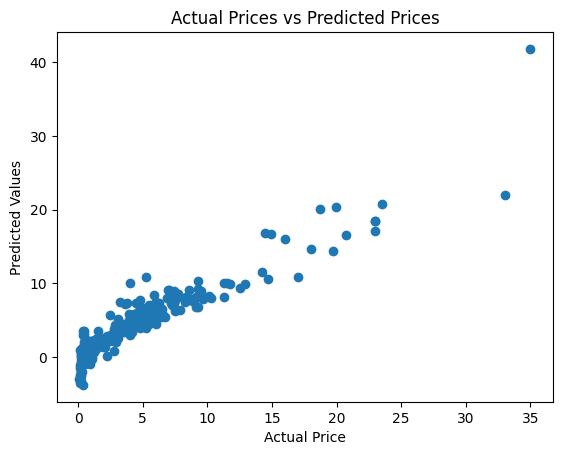

In [19]:
plt.scatter(Y_train, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Values')
plt.title('Actual Prices vs Predicted Prices')

Prediction on Test Data

In [24]:
#Prediction Test Data
Test_Prediction = LRModel.predict(X_test)

R Squared Error For Test Data

In [25]:
# Using R-Square Error Method
Error_Score =metrics.r2_score(Y_test, Test_Prediction)
print("R Squared Error is : ", Error_Score)

R Squared Error is :  0.8365766715027051


Plotting the Graph for Test Data

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

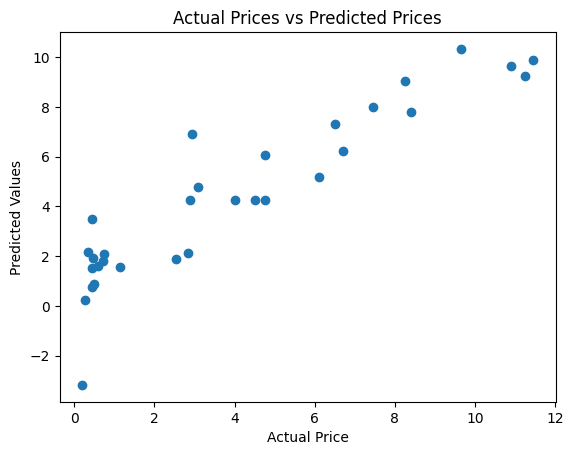

In [26]:
plt.scatter(Y_test, Test_Prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Values')
plt.title('Actual Prices vs Predicted Prices')

Performing Lasso Regression To Check the Performace

Training the Machine Learning Model

2.Lasso Regression

In [27]:
#Training the Model with Linear Regression
Lasso_Regress = Lasso()

#fitting the model for Training the model with Linear Regression
Lasso_Regress.fit(X_train, Y_train)


Lasso()

Trying Some Trouble Shooting for the Lasso Regression Error

In [ ]:
# Create a new column in the Y_train DataFrame called is_manual.
#Y_train['is_manual'] = Y_train['Selling_Price'].apply(lambda x: x == 'Manual')

# Set the values of the is_manual column to True if the value in the name column is Manual, and False otherwise.
#Y_train['is_manual'] = Y_train['is_manual'].astype(bool)

# Replace the values in the name column with the values in the is_manual column.
#Y_train['Selling_Price'] = Y_train['is_manual'].astype(str)

# Fit the LinearRegression model to the X_train and Y_train DataFrames.
#LRModel.fit(X_train, Y_train)

Evaluating The Regression Model

In [28]:
#Training Data Prediction
prediction2 = Lasso_Regress.predict(X_train)

R Squared Error to check for Error Chance

In [29]:
# Using R-Square Error Method
Error_Score =metrics.r2_score(Y_train, prediction)
print("R Squared Error is : ", Error_Score)

R Squared Error is :  0.8799451660493711


Plotting the Graph of Prediction with respect to Actual Values

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

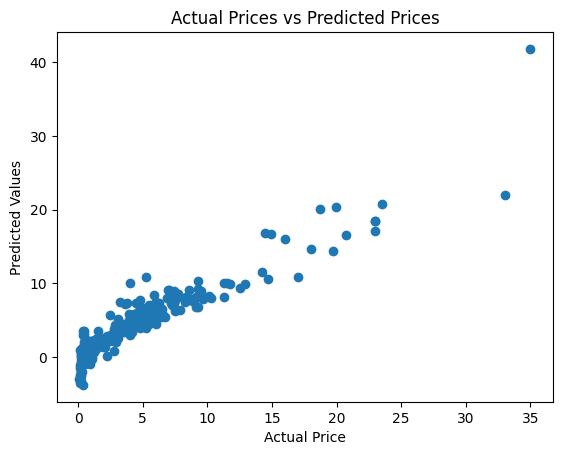

In [30]:
plt.scatter(Y_train, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Values')
plt.title('Actual Prices vs Predicted Prices')

Prediction on Test Data

In [31]:
#Prediction Test Data
Test_Prediction = Lasso_Regress.predict(X_test)

R Squared Error For Test Data

In [32]:
# Using R-Square Error Method
Error_Score =metrics.r2_score(Y_test, Test_Prediction)
print("R Squared Error is : ", Error_Score)

R Squared Error is :  0.8709167941173195


Plotting the Graph for Test Data

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

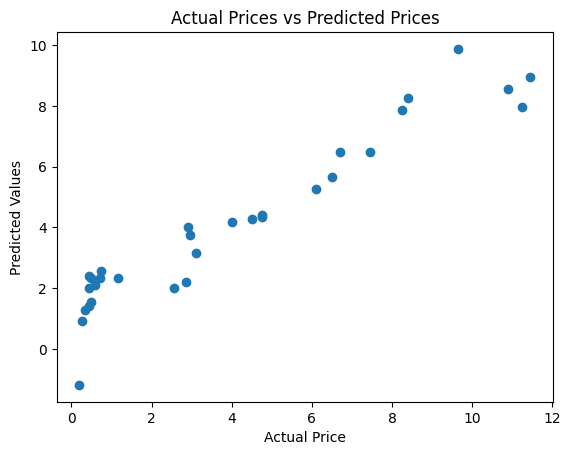

In [33]:
plt.scatter(Y_test, Test_Prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Values')
plt.title('Actual Prices vs Predicted Prices')